# Title of your Work


*Teammembers*

## Introduction:

Explain why you have chosen this topic. Why is it interesting? What makes it hard to solve?



## Idea


Explain what your idea is. Whats your approach in tackling this problem. Explain in detail the general idea, the steps and also why this should lead to a better solution


## Solution

### "Naive"/default solution

Describe how the naive solution is implemented. If the default solution already has some optimization in it, explain what it is.
And then implement the solution in code. Explain what parameters can be changed in the code below.

In [1]:
# Importing all the parts we will need.
from typing import List, Optional

from qiskit import transpile, QuantumCircuit, QuantumRegister, ClassicalRegister, Aer
from qiskit.providers.fake_provider import FakeManilaV2, FakeMumbaiV2
from qiskit.visualization import plot_histogram, plot_gate_map
from qiskit_optimization.applications import Tsp
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

from qiskit.circuit.library import TwoLocal
from qiskit.algorithms.minimum_eigensolvers import SamplingVQE, NumPyMinimumEigensolver
from qiskit.algorithms.optimizers import SPSA, COBYLA
from qiskit.utils import algorithm_globals, QuantumInstance
from qiskit_optimization.converters import QuadraticProgramToQubo
from qiskit_optimization.algorithms import MinimumEigenOptimizer
from qiskit.primitives import Sampler
from qiskit.algorithms import QAOA

import warnings

warnings.filterwarnings("ignore")

import math

pi = math.pi


# reference: E´Combarro, Elias, Samuel Gonzalez-Castillo, and Alberto di Meglio. A Practical Guide to Quantum Machine Learning and Quantum Optimization. 1st ed. Packt Publishing, 2023. Web. 30 May 2023.

# two qubit example

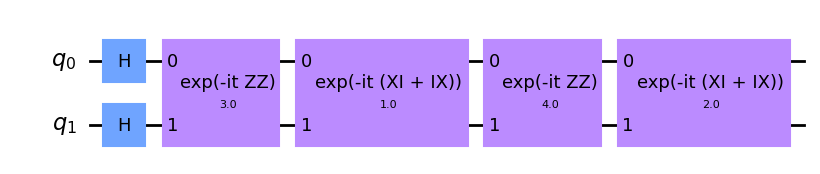

In [2]:
# define qaoa
# take H1 = Z0Z1, H0 = X0X1
from qiskit.opflow import Z

H1 = Z^Z
qaoa = QAOA(reps = 2)
circuit = qaoa.construct_circuit([1,2,3,4], H1)[0] # use beta1=1, beta2=2, gamma1=3, gamma2=4
circuit.draw('mpl')

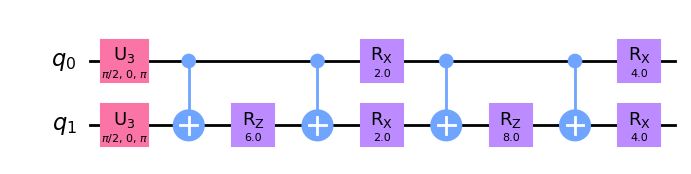

In [3]:
circuit.decompose().decompose().draw('mpl')

In [4]:
# run on qasm simulator
seed = 1234
algorithm_globals.random_seed = seed
quantum_instance = QuantumInstance(Aer.get_backend("qasm_simulator"), 
                                   seed_simulator=seed, 
                                   seed_transpiler=seed, 
                                   shots=1024
                                  )
qaoa = QAOA(optimizer = COBYLA(), quantum_instance=quantum_instance)
result = qaoa.compute_minimum_eigenvalue(H1)
print(result)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 29,
    'eigenstate': {'01': 0.7132945131570829, '10': 0.7008644216251814},
    'eigenvalue': (-0.9999999999999999+0j),
    'optimal_circuit': None,
    'optimal_parameters': {   ParameterVectorElement(γ[0]): 0.7970560548034816,
                              ParameterVectorElement(β[0]): 7.465765403323452},
    'optimal_point': array([7.4657654 , 0.79705605]),
    'optimal_value': -0.9999999999999999,
    'optimizer_evals': None,
    'optimizer_result': None,
    'optimizer_time': 0.08290290832519531}


In [5]:
# run on fake device
seed = 1234
algorithm_globals.random_seed = seed
quantum_instance = QuantumInstance(FakeMumbaiV2(), 
                                   seed_simulator=seed, 
                                   seed_transpiler=seed, 
                                   shots=1024
                                  )
qaoa = QAOA(optimizer = COBYLA(), quantum_instance=quantum_instance)
result = qaoa.compute_minimum_eigenvalue(H1)
print(result)
#output means more less noise -> states "00", "01", "10", "11"

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 23,
    'eigenstate': {   '00': 0.20009763241977652,
                      '01': 0.6853660062331659,
                      '10': 0.676040864149498,
                      '11': 0.18221724671391565},
    'eigenvalue': (-0.853515625+0j),
    'optimal_circuit': None,
    'optimal_parameters': {   ParameterVectorElement(β[0]): 7.454944276674637,
                              ParameterVectorElement(γ[0]): 0.7753143666402692},
    'optimal_point': array([7.45494428, 0.77531437]),
    'optimal_value': -0.853515625,
    'optimizer_evals': None,
    'optimizer_result': None,
    'optimizer_time': 6.005857706069946}


# advanced example

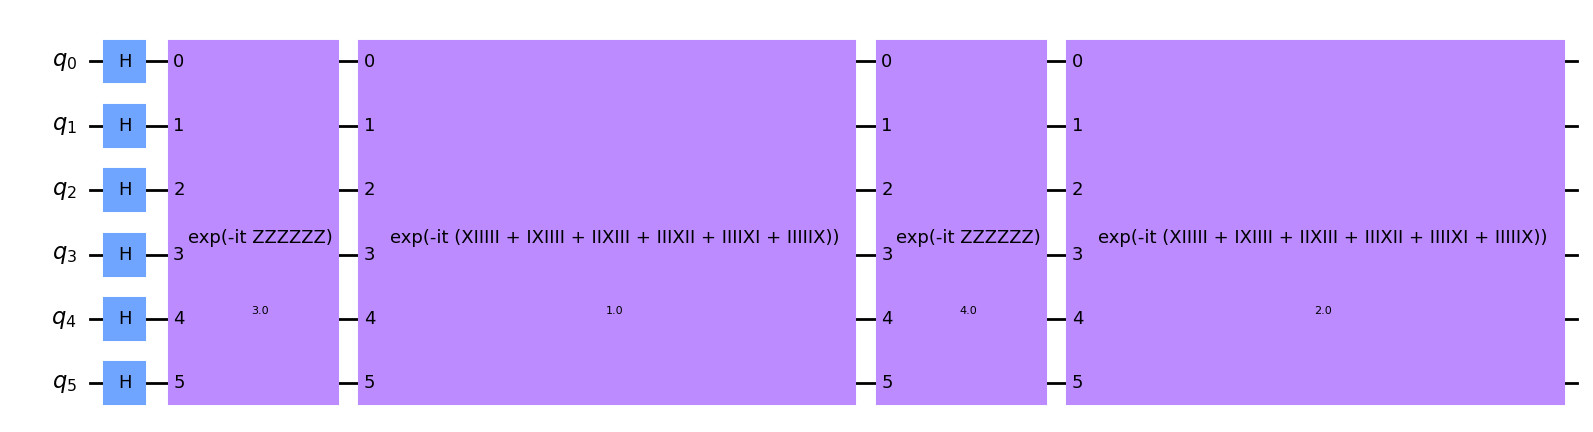

In [6]:
# define qaoa
# take H1 = Z0Z1Z2Z3Z4Z5, H0 = X0X1X2X3X4X5 -> Eigenvalue should be -1/+1
from qiskit.opflow import Z

H1 = Z^Z^Z^Z^Z^Z
qaoa = QAOA(reps = 2)
circuit = qaoa.construct_circuit([1,2,3,4],H1)[0] # use beta, gamma,...
circuit.draw('mpl')

In [7]:
# run on qasm simulator
# run on qasm simulator
seed = 1234
algorithm_globals.random_seed = seed
quantum_instance = QuantumInstance(Aer.get_backend("qasm_simulator"), 
                                   seed_simulator=seed, 
                                   seed_transpiler=seed, 
                                   shots=1024
                                  )
qaoa = QAOA(optimizer = COBYLA(), quantum_instance=quantum_instance)
result = qaoa.compute_minimum_eigenvalue(H1)
print(result)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 32,
    'eigenstate': {   '000000': 0.05412658773652741,
                      '000001': 0.1795175827043134,
                      '000010': 0.1875,
                      '000100': 0.1795175827043134,
                      '000101': 0.05412658773652741,
                      '000110': 0.05412658773652741,
                      '000111': 0.19764235376052372,
                      '001000': 0.1795175827043134,
                      '001001': 0.04419417382415922,
                      '001010': 0.03125,
                      '001011': 0.15625,
                      '001101': 0.17399263633843817,
                      '001110': 0.16828640022295324,
                      '001111': 0.03125,
                      '010000': 0.14986973510352247,
                      '010010': 0.03125,
                      '010011': 0.1767766952966369,
                      '010101': 0.17399263633843817,
                      '010110': 0.18221724

In [8]:
# run on fake device
seed = 1234
algorithm_globals.random_seed = seed
quantum_instance = QuantumInstance(FakeMumbaiV2(), 
                                   seed_simulator=seed, 
                                   seed_transpiler=seed, 
                                   shots=1024
                                  )
qaoa = QAOA(optimizer = COBYLA(), quantum_instance=quantum_instance)
result = qaoa.compute_minimum_eigenvalue(H1)
print(result)

{   'aux_operator_eigenvalues': None,
    'cost_function_evals': 31,
    'eigenstate': {   '000000': 0.09375,
                      '000001': 0.16535945694153692,
                      '000010': 0.15625,
                      '000011': 0.0625,
                      '000100': 0.14657549249448218,
                      '000101': 0.09375,
                      '000110': 0.07654655446197431,
                      '000111': 0.13975424859373686,
                      '001000': 0.13258252147247765,
                      '001001': 0.07654655446197431,
                      '001010': 0.07654655446197431,
                      '001011': 0.15934435979977452,
                      '001100': 0.08267972847076846,
                      '001101': 0.15625,
                      '001110': 0.19008632907181935,
                      '001111': 0.11267347735824966,
                      '010000': 0.15625,
                      '010001': 0.10364452469860624,
                      '010010': 0.0988211768802618

### Your solution

Explain which paramateres can be changed in the code below, how to get different results.

In [ ]:

# Your code here: Implementation of the good solution

## Results

Analyse both solutions the naive and yours, and show what is better.
This can both be done theoretically (like Big O notation) or also some concrete results.
If possible show below some graphs to compare the 2 solutions helping to explain what makes your solution so good.

In [ ]:

# Your code here: Use code to show graphs